# Titanic

We will use the Kaggle competition "titanic" dataset to illustrate a few fundatmental concepts of ML.  The competition is simple: you are to use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.

The Titanic competition page can be found [here](https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook)

![](./images/titanic.jpeg)

In [182]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # visualization


## Reviewing Data

In [2]:
# Data should be in ../data/titanic

import os
for dirname, _, filenames in os.walk('../data/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/titanic/test.csv
../data/titanic/train.csv
../data/titanic/gender_submission.csv


In [4]:
train_data = pd.read_csv("../data/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("../data/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Features

The titanic dataset has roughly the following types of features:

- Categorical/Nominal: Variables that can be divided into multiple categories but having no order or priority. 
    - Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)
- Binary: A subtype of categorical features, where the variable has only two categories. 
    - Eg: Sex (Male/Female)
- Ordinal: They are similar to categorical features but they have an order(i.e can be sorted). 
    - Eg. Pclass (1, 2, 3)
- Continuous: They can take up any value between the minimum and maximum values in a column. 
    - Eg. Age, Fare
- Count: They represent the count of a variable. 
    - Eg. SibSp (Number of Siblings/Spouses Aboard), Parch (Number of Parents/Children Aboard)
- Useless: They don’t contribute to the final outcome of an ML model. Here, PassengerId, Name, Cabin and Ticket might fall into this category.

In [10]:
all_data = pd.concat([train_data, test_data], ignore_index=True, sort=False)

The total dataset had 1309 rows and 12 columns. Each row represented a unique traveler on RMS Titanic, and each column described different valued attributes for each commuter.

### Analyzing Gender

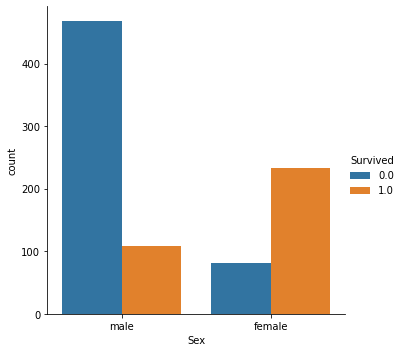

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Countplot for gender
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = all_data)

Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

### Analyzing Class

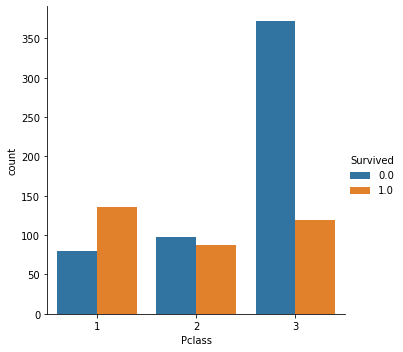

In [36]:
# Countplot for passenger class
sns.catplot(x ="Pclass", hue ="Survived",
kind ="count", data = all_data)

Just by observing the graph, it can be approximated that the survival rate for first class is significantly higher than other classes. Therefore, that Pclass that a passenger is in plays an important role in determining if one is going to survive.

### Analyzing Embarking Port

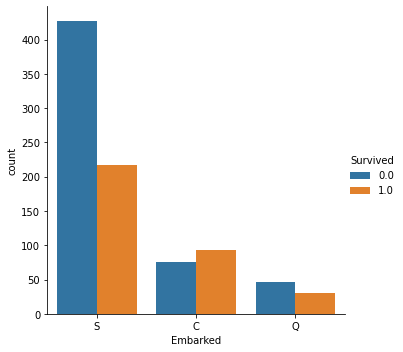

In [39]:
# Countplot for where someone has embarked to Titanic
# (C = Cherbourg; Q = Queenstown; S = Southampton)
sns.catplot(x ="Embarked", hue ="Survived",
kind ="count", data = all_data)

Is there "confounding" explanation for where someone embarked, and their survival rate?

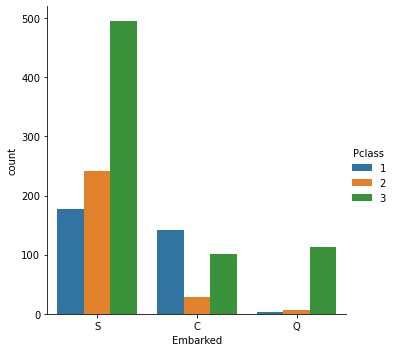

In [40]:
sns.catplot(x ="Embarked", hue ="Pclass",
kind ="count", data = all_data)

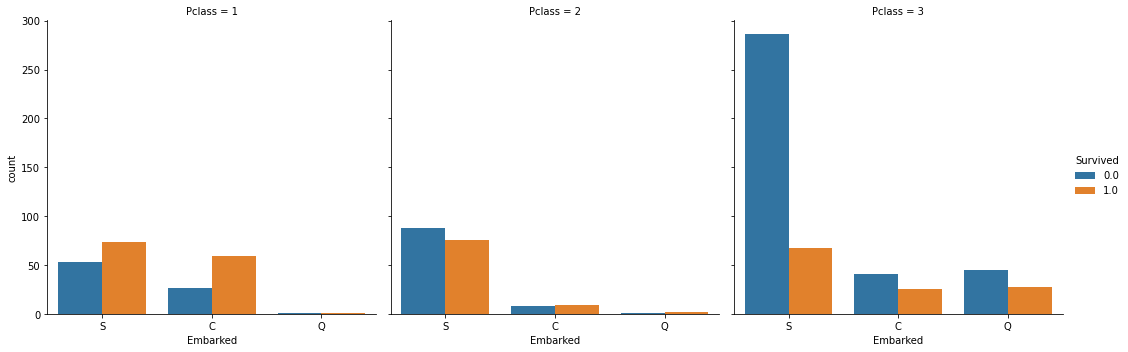

In [55]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = all_data)

Some notable observations are: 

- Majority of the passengers boarded from S. So, the missing values can be filled with S.
- Majority of class 3 passengers boarded from Q.
- S looks lucky for class 1 and 2 passengers compared to class 3.

### Understanding Missing Values

So, let's understand the survival numbers ...

In [25]:
print("number survived: {0} out of {1}, which is {2:.3g}%"
          .format(int(all_data['Survived'].sum()),
                  len(all_data),
                  all_data['Survived'].sum() / len(all_data) * 100.0))

number survived: 342 out of 1309, which is 26.1%


In [28]:
print("number died: {0} out of {1}, which is {2:.3g}%"
          .format(len(all_data[all_data['Survived'] == 0]),
                  len(all_data),
                  len(all_data[all_data['Survived'] == 0]) / len(all_data) * 100.0))

number died: 549 out of 1309, which is 41.9%


What happened those who are not in the "survived" or in the "died" categories?

The dataset had a couple of columns that were missing values. The ‘Cabin’ attribute had 1014 missing values. The column ‘Embarked’ that depicted a commuter’s boarding point had a total of 2 missing values. The property ‘Age’ had 263 missing values, and the column ‘Fare’ had one.

In [29]:
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

To understand the categorical and non-categorical features, let's look at the number of unique values each column had. The attributes ‘Sex’ and ‘Survived’ had two possible values, properties ‘Embarked’ & ‘Pclass’ had three possible values.

In [30]:
all_data.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

"Pclass" denotes the passenger class: class-1, class-2, class-3. The third class had the highest number of commuters, followed by class-2 and class-1. The number of passengers in the third class was more than the number of passengers in the first and second class combined. The survival chances of a class-1 traveler were higher than a class-2 and class-3 traveler.

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

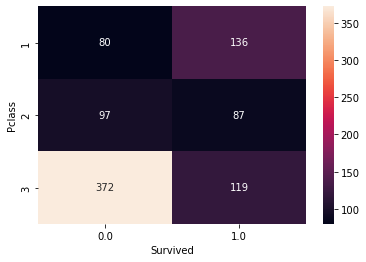

In [41]:
# Group the dataset by Pclass and Survived and then unstack them
group = all_data.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

### Analyzing Age

Let's understand if age is related to survival

<AxesSubplot:xlabel='Sex', ylabel='Age'>

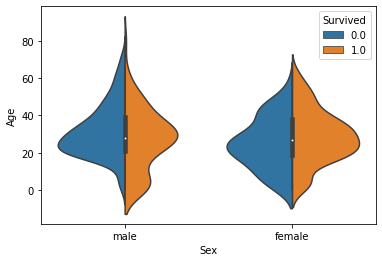

In [43]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = all_data, split = True)

This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –  

- Good for children.
- High for women in the age range 20-50.
- Less for men as the age increases.

Since Age column is important, the missing values should be filled.

### Analyzing Family Size

Family_Size denotes the number of people in a passenger’s family. It is calculated by summing the SibSp and Parch columns of a respective passenger. Also, another column Alone is added to check the chances of survival of a lone passenger against the one with a family.

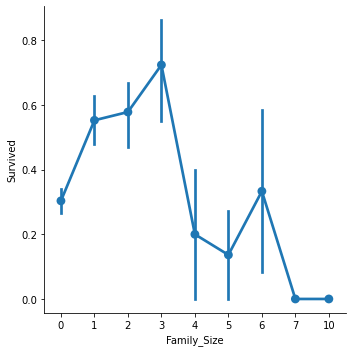

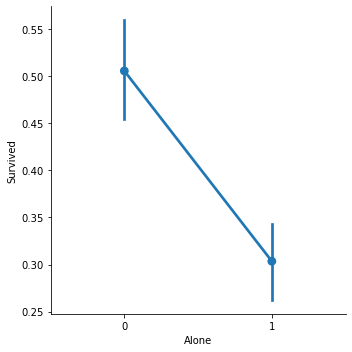

In [59]:
# Adding a column Family_Size
all_data['Family_Size'] = 0
all_data['Family_Size'] = all_data['Parch']+all_data['SibSp']
 
# Adding a column Alone
all_data['Alone'] = 0
all_data.loc[all_data.Family_Size == 0, 'Alone'] = 1

# TRAINING -------------------
# Adding a column Family_Size
train_data['Family_Size'] = 0
train_data['Family_Size'] = train_data['Parch']+train_data['SibSp']
 
# Adding a column Alone
train_data['Alone'] = 0
train_data.loc[train_data.Family_Size == 0, 'Alone'] = 1

# TESTING -------------------
# Adding a column Family_Size
test_data['Family_Size'] = 0
test_data['Family_Size'] = test_data['Parch']+test_data['SibSp']
 
# Adding a column Alone
test_data['Alone'] = 0
test_data.loc[test_data.Family_Size == 0, 'Alone'] = 1


# Factorplot for Family_Size
sns.catplot(x ='Family_Size', y ='Survived', data = all_data, kind='point')
 
# Factorplot for Alone
sns.catplot(x ='Alone', y ='Survived', data = all_data, kind='point')

Important observations – 

- If a passenger is alone, the survival rate is less.
- If the family size is greater than 5, chances of survival decrease considerably.

### Analyzing Fare : a continuous feature

Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins(as done for Age feature) to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is more.

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

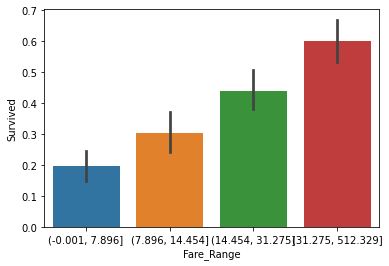

In [60]:
# Divide Fare into 4 bins
all_data['Fare_Range'] = pd.qcut(all_data['Fare'], 4)
train_data['Fare_Range'] = pd.qcut(train_data['Fare'], 4)
test_data['Fare_Range'] = pd.qcut(test_data['Fare'], 4)

# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = all_data)

### Conclusion: Prepping Input Features

For missing features, we need to have a strategy to fill in these values sensibly.

The columns that can be dropped are: 
- PassengerId, Name, Ticket, Cabin: They are strings, cannot be categorized and don’t contribute much to the outcome. 
- Age, Fare: Instead, the respective range columns are retained.


In [61]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Alone',
       'Fare_Range'],
      dtype='object')

In [62]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Alone',
       'Fare_Range'],
      dtype='object')

In [63]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Alone',
       'Fare_Range'],
      dtype='object')

## Missing Values

The data in the real world has many missing data in most cases, as in the Titanic data set. There might be different reasons why each value is missing. There might be loss or corruption of data, or there might be specific reasons also. The missing data will decrease the predictive power of your model. If you apply algorithms with missing data, then there will be bias in the estimation of parameters. You cannot be confident about your results if you don’t handle missing data.

### Types of Missing Values

The missing data can occur due to diverse reasons. We can categorize them into three main groups: Missing Completely at Random, Missing At Random, Not Missing at Random.

1. Missing Completely at Random (MCAR)
The missing data do not follow any particular pattern, they are simply random. The missing of these data is unrelated or independent of the remaining variables.

2. Missing At Random (MAR)
Here unlike MCAR, the data is missing amongst particular subsets. It is possible to predict if the data will be present/absent with the help of other features. But, you cannot predict the missing data themselves.

3. Not Missing at Random (NMAR)
This is a serious and tricky situation. Let’s say the purpose of the survey is to measure the overuse/addiction to social media. If people who excessively use social media, do not fill the survey intentionally, then we have a case of NMAR. This will most probably lead to a bias in results. 


### Titanic Missing Values

In [58]:
missing_values=train_data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Notice that 3 columns have missing values: Age, Cabin, Embarked

Although we know how many values are missing in each column, it is essential to know the percentage of them against the total values. So, let us calculate that in a single line of code.

In [89]:
mis_value_percent = 100.0 * train_data.isnull().sum() / len(train_data)

type(mis_value_percent[0])

numpy.float64

In [90]:
print(mis_value_percent)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
Family_Size     0.000000
Alone           0.000000
Fare_Range      0.000000
dtype: float64


It is clear that 77% of the ‘Cabin’ Column is missing, which is a very significant percentage. Age has around 19% of data missing and Embarked has only 0.2% missing. This is the quantitative analysis of missing data we have. What about qualitative? Keep reading!

### Visualizing Missing Values

The “Missingno” python package allows missing value visualization.

In [91]:
!pip install missingno

Using this, we can make visualizations in the form of heat maps, bar charts, and matrices. We can find the correlation of the columns containing the missing with the target column.

Start by making a bar chart for non-null values using the ‘bar()’ function of the missingno library. You have passed the pandas dataframe to this function.

<AxesSubplot:>

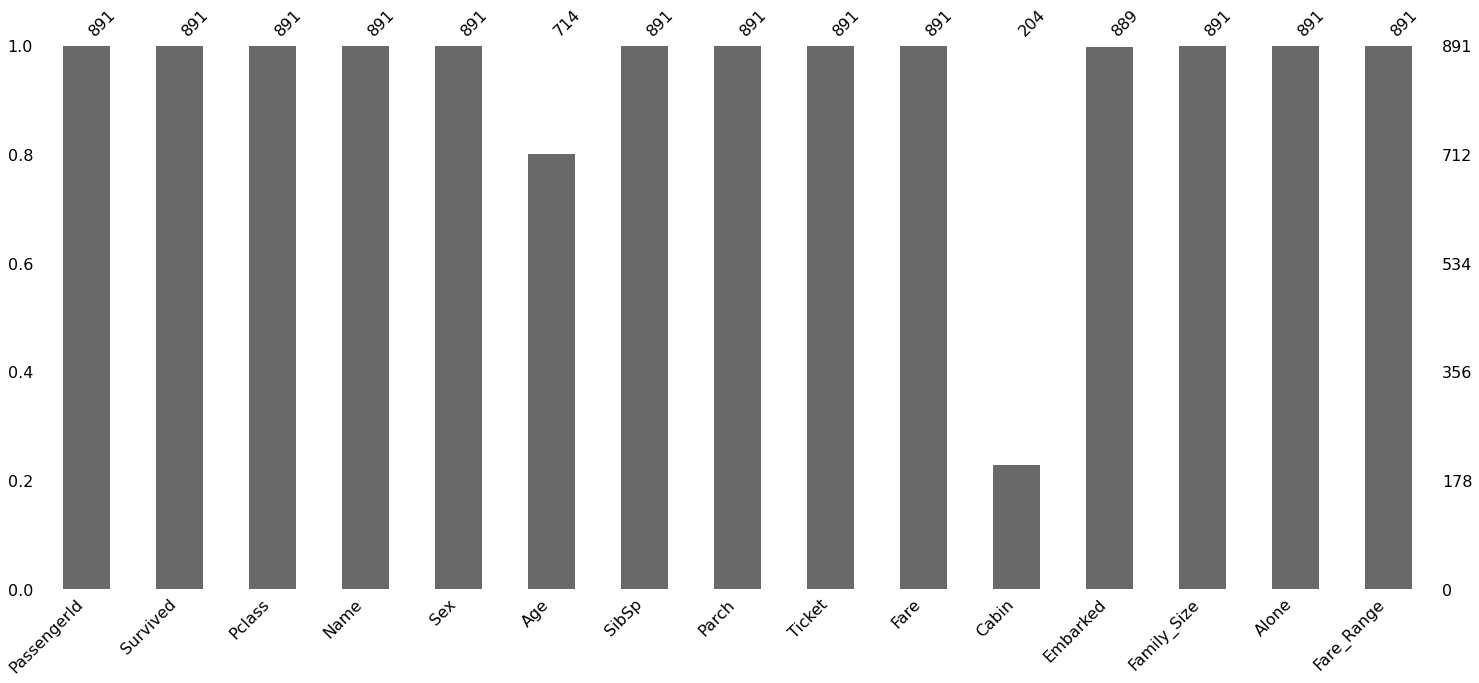

In [93]:
import missingno as msno
msno.bar(train_data)

Next, we can plot the matrix visualization. This helps us to know how the missing data is distributed through the data, that is if they are localized or evenly spread, or is there any pattern and many such questions.

<AxesSubplot:>

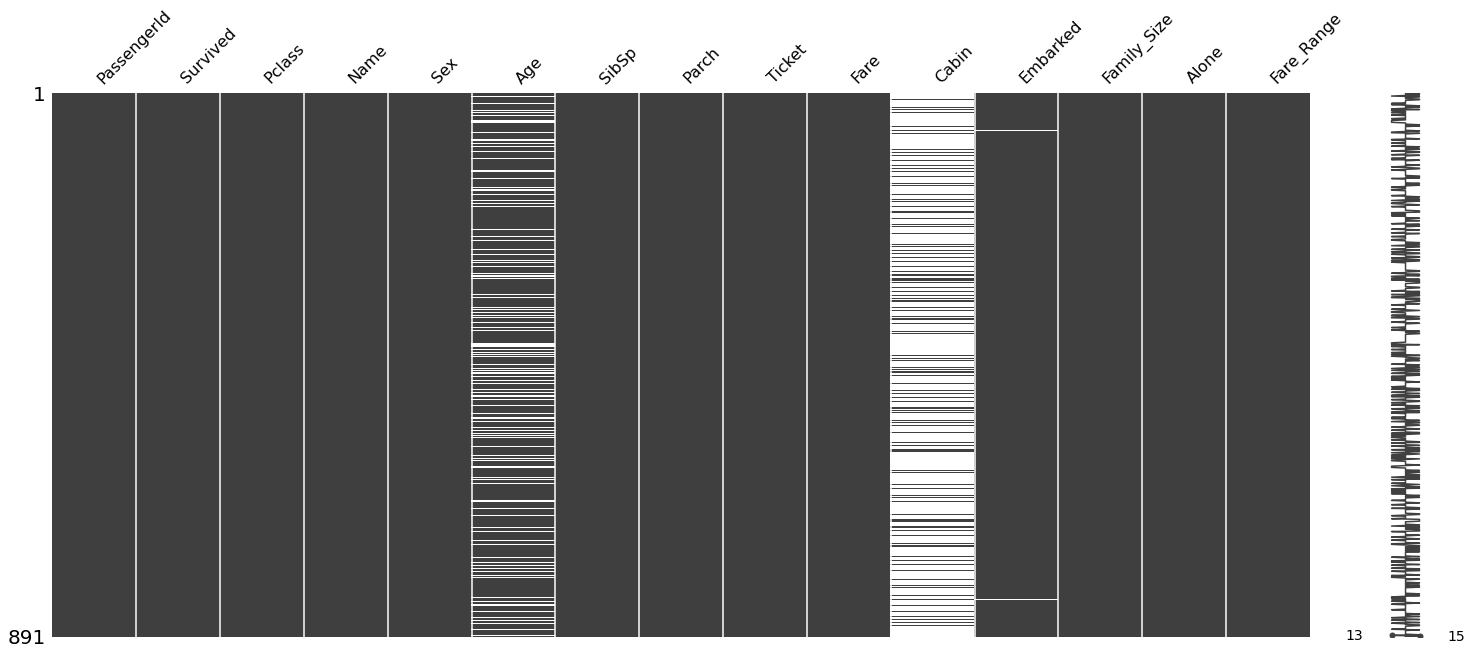

In [94]:
msno.matrix(train_data)

In the matrix plot, you will see blank lines for each missing data. Notice that the ‘Embarked’ column has just two random missing data, which follow no pattern. They were probably lost during data acquisition. So, this can be classified as Missing completely at Random.

The age and Cabin columns could possibly be MAR. But we want to ensure that there are no correlations between them.

How to do that?

Lucky for us, missingno package also provides the ‘heatmap’ function. Using this we can find if there are any correlations between missing data of different columns.

<AxesSubplot:>

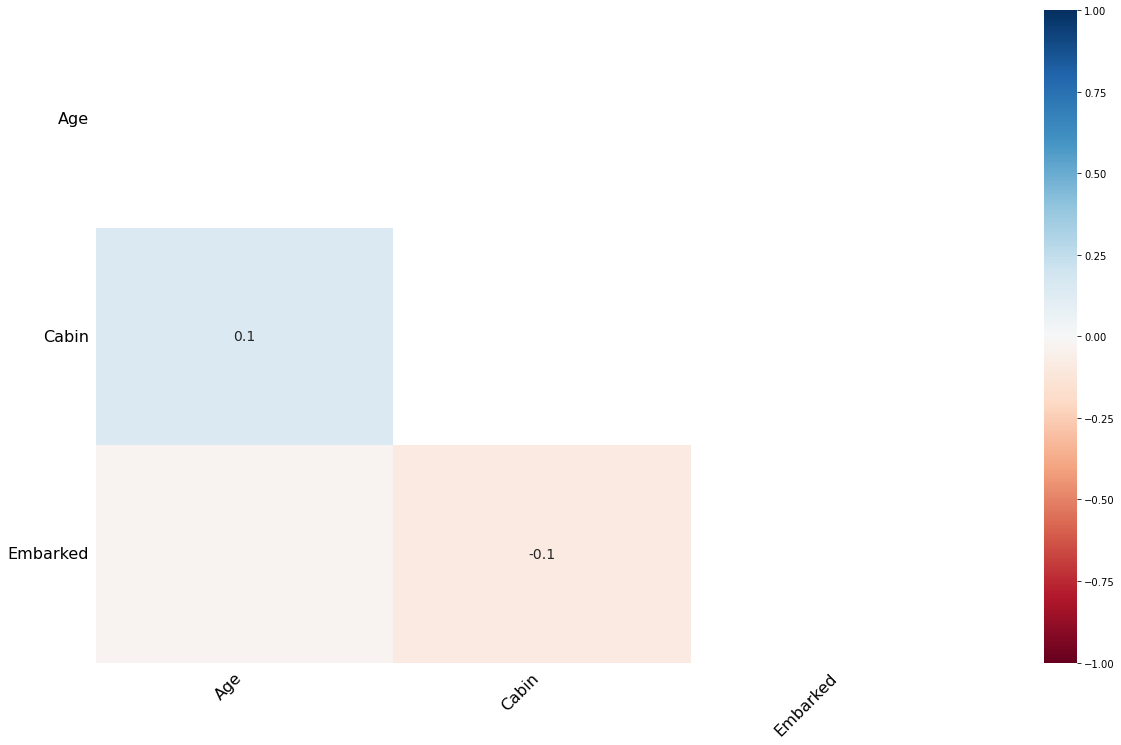

In [96]:
msno.heatmap(train_data)

The heatmap shows there is no such strong correlation between the missing data of the Age and Cabin column. So, the missing data of these columns can be classified as MAR or Missing at Random.

### Dropping rows with missing values

Dropping rows with missing values
It is a simple method, where we drop all the rows that have any missing values belonging to a particular column. As easy as this is, it comes with a huge disadvantage. You might end up losing a huge chunk of your data. This will reduce the size of your dataset and make your model predictions biased. You should use this only when the no of missing values is very less.

For example, the ‘Embarked’ column has just 2 missing values. So, we can drop rows where this column is missing. Follow the below code snippet.

In [98]:
print('Dataset before :', len(train_data))
train_data.dropna(subset=['Embarked'],how='any',inplace=True)
print('Dataset after :', len(train_data))
print('missing values :',train_data['Embarked'].isnull().sum())

Dataset before : 889
Dataset after : 889
missing values : 0


### Dropping columns
When a column has large missing values, there is no point in imputing the values with the least available true data we have. So, when any column has greater than 80% of values missing, you can just drop that column from your analysis. In our case, ‘Cabin’ has 77% data missing, so you can take the choice of dropping this column.

Make sure that the dropped column is not crucial for your analysis. If so, you should try to get more data and then impute the missing values.

### Imputation for Continuous Variable

When you have numeric columns, you can fill the missing values using different statistical values like mean, median, or mode. You will not lose data, which is a big advantage of this case. These 3 simple methods have the following advantages and disadvantages:

- *mean* : Mean imputation has certain disadvantages. If the data has a very uneven distribution, with many outliers, then the Mean will not reflect the actual distribution of the data. Mean is affected greatly by extreme values or outliers. So, if the data doesn’t have many outliers and follows near-normal distribution, use mean imputation

    ```
    train['Age']=train['Age'].replace(np.NaN,train['Age'].mean())
    ```

- *median* : replacing with medians is not affected by extreme values as by means

    ```
    train['Age']=train['Age'].replace(np.NaN,train['Age'].median())
    ```

- *mode* : imputation with the mode is popular for categorical missing values, and is very simple to do.

### Imputation with regression

Instead of filling a single mean or median value in all places, what if we can predict them with help of other variables we have?

Yes! We can use the features with non-null values to predict the missing values. A regression or classification model can be built for the prediction of missing values. Let us implement this for the ‘Age’ column of our titanic dataset.

We can process the data for building the model. The “Age” feature will be the target variable.

x_train: The rows of the dataset that have the “Age” value present are filtered. The ‘Age’ is target x_test: It is the “Age” column with non-null values

The y_train will have the data which have missing Age values, which shall be predicted (y_pred)

In [120]:
reg_data = train_data[["Survived", "Pclass", "Sex", "SibSp", "Parch", "Fare", "Age"]].copy()
reg_data.loc[:, ('Sex')] = [1 if x=="male" else 0 for x in reg_data.loc[:, ('Sex')]]

reg_test = reg_data[reg_data.loc[:,'Age'].isnull()]
reg_data.dropna(inplace=True)
x_train = reg_data.drop("Age", axis=1)
x_test = reg_test.drop("Age", axis=1)
y_train = reg_data.loc[:,"Age"]

Let us fit a Linear Regression Model to these data. I’ll be using the sklearn library here.

In [117]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Now, we have the null values of the Age column predicted in y_pred.

In [118]:
print(x_test[:10])

    Survived  Pclass  Sex  SibSp  Parch      Fare
5          0       3    1      0      0    8.4583
17         1       2    1      0      0   13.0000
19         1       3    0      0      0    7.2250
26         0       3    1      0      0    7.2250
28         1       3    0      0      0    7.8792
29         0       3    1      0      0    7.8958
31         1       1    0      1      0  146.5208
32         1       3    0      0      0    7.7500
36         1       3    1      0      0    7.2292
42         0       3    1      0      0    7.8958


This is how inputs are passed to the regression model. Let’s look at the predicted age values.

In [119]:
print(y_pred[:10])

[29.09220959 30.0710157  22.36474003 29.110828   22.35486395 29.10070132
 32.25966175 22.35681441 22.16582531 29.10070132]


In [142]:
reg_data = train_data[["Survived", "Pclass", "Sex", "SibSp", "Parch", "Fare", "Age"]].copy()
reg_data.loc[:, ('Sex')] = [1 if x=="male" else 0 for x in reg_data.loc[:, ('Sex')]]

reg_data['Age_Pred'] = model.predict(reg_data.drop('Age', axis=1))

In [143]:
reg_data[:10]

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Age_Pred
0,0,3,1,1,0,7.2500,22.0,25.123622
1,1,1,0,1,0,71.2833,38.0,33.395478
2,1,3,0,0,0,7.9250,26.0,22.354173
3,1,1,0,1,0,53.1000,35.0,33.669981
4,0,3,1,0,0,8.0500,35.0,29.098373
5,0,3,1,0,0,8.4583,NaN,29.092210
6,0,1,1,0,0,51.8625,54.0,44.421579
7,0,3,1,3,1,21.0750,2.0,16.149480
8,1,3,0,0,2,11.1333,27.0,20.722187
9,1,2,0,1,0,30.0708,14.0,26.025330


In [144]:
reg_data.shape

(889, 8)

In [145]:
train_data.shape

(889, 15)

In [187]:
for i in range(reg_data.shape[0]):
#    if reg_data.at[i,'Age'] == np.NaN:
    print(str(reg_data.at[i,'Age']) + " : " + str(reg_data.at[i,'Age'] == np.nan))


22.0 : False
38.0 : False
26.0 : False
35.0 : False
35.0 : False
nan : False
54.0 : False
2.0 : False
27.0 : False
14.0 : False
4.0 : False
58.0 : False
20.0 : False
39.0 : False
14.0 : False
55.0 : False
2.0 : False
nan : False
31.0 : False
nan : False
35.0 : False
34.0 : False
15.0 : False
28.0 : False
8.0 : False
38.0 : False
nan : False
19.0 : False
nan : False
nan : False
40.0 : False
nan : False
nan : False
66.0 : False
28.0 : False
42.0 : False
nan : False
21.0 : False
18.0 : False
14.0 : False
40.0 : False
27.0 : False
nan : False
3.0 : False
19.0 : False
nan : False
nan : False
nan : False
nan : False
18.0 : False
7.0 : False
21.0 : False
49.0 : False
29.0 : False
65.0 : False
nan : False
21.0 : False
28.5 : False
5.0 : False
11.0 : False
22.0 : False


KeyError: 61

In [ ]:
### Why does this not work???
# reg_data.loc[:, ('Age')] = [a if a != np.NaN 
                              else p
                              for a in reg_data.loc[:, 'Age'] 
                              for p in reg_data.loc[:, 'Age_Pred'] 
                           ]

## Gender-based Prediction

In [6]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [7]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


From this you can see that almost 75% of the women on board survived, whereas only 19% of the men lived to tell about it. Since gender seems to be such a strong indicator of survival, using just gender to predict survival is not a bad first guess!

## Basic Random Forest Model

We'll build what's known as a random forest model. This model is constructed of several "trees" (there are three trees in the picture below, but we'll construct 100!) that will individually consider each passenger's data and vote on whether the individual survived. Then, the random forest model makes a democratic decision: the outcome with the most votes wins!

![](./images/titanic-random-forest.png)

The code cell below looks for patterns in four different columns ("Pclass", "Sex", "SibSp", and "Parch") of the data. It constructs the trees in the random forest model based on patterns in the train.csv file, before generating predictions for the passengers in test.csv. The code also saves these new predictions in a CSV file submission.csv.

In [8]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('titanic-rf-prediction.csv', index=False)

Score for this submission is: 0.77511 -- that's an improvement over a simple gender-based prediction score, but not by much!

## Validation with testing

In [ ]:
# get predicted prices on test data
test_y = test_data["Survived"]

test_predictions = model.predict(test_data)
print(mean_absolute_error(, test_predictions))